<a href="https://colab.research.google.com/github/zidankhainur2/machine-learning-practice/blob/main/REVISI_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

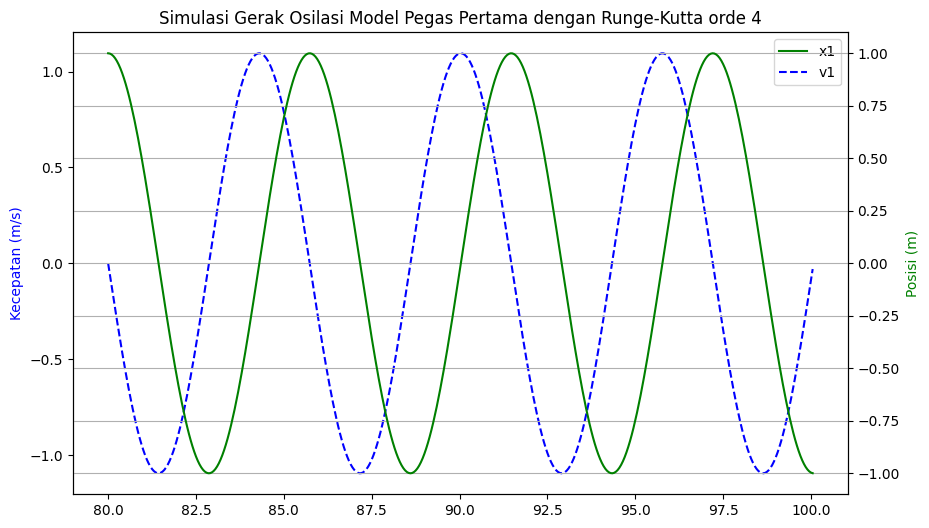

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
m1 = 5.0  # Massa pegas pertama (kg)
k1 = 6.0  # Konstanta pegas k1 (N/m)

# Persamaan diferensial
def f(t, x, v):
    dxdt = v
    dvdt = (-k1/m1) * x
    return dxdt, dvdt

# Metode Runge-Kutta orde 4
def runge_kutta_4th_order(f, x, v, t, h):
    k1x, k1v = f(t, x, v)
    k2x, k2v = f(t + h/2, x + k1x * h/2, v + k1v * h/2)
    k3x, k3v = f(t + h/2, x + k2x * h/2, v + k2v * h/2)
    k4x, k4v = f(t + h, x + k3x * h, v + k3v * h)
    x_new = x + (k1x + 2*k2x + 2*k3x + k4x) * h/6
    v_new = v + (k1v + 2*k2v + 2*k3v + k4v) * h/6
    return x_new, v_new

# Kondisi awal
x1_0 = 1.0  # Simpangan awal benda pertama (m)
v1_0 = 0.0  # Kecepatan awal benda pertama (m/s)

# Waktu simulasi
t0 = 80  # Waktu awal
tn = 100  # Waktu akhir
h = 0.05  # Langkah waktu

# Inisialisasi array untuk menyimpan hasil
t_values = [t0]
x1_values = [x1_0]
v1_values = [v1_0]

# Simulasi menggunakan Runge-Kutta
t = t0
x1 = x1_0
v1 = v1_0
while t < tn:
    x1, v1 = runge_kutta_4th_order(f, x1, v1, t, h)
    t += h
    t_values.append(t)
    x1_values.append(x1)
    v1_values.append(v1)

# Buat grafik dengan twin y-axis dan garis biru putus-putus
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax2.plot(t_values, x1_values, label='x1', color='green')
ax1.plot(t_values, v1_values, label='v1', color='blue', linestyle='--')

ax2.set_xlabel('Waktu (s)')
ax2.set_ylabel('Posisi (m)', color='green')
ax1.set_ylabel('Kecepatan (m/s)', color='blue')

# Tambahkan label untuk legenda
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax1.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Simulasi Gerak Osilasi Model Pegas Pertama dengan Runge-Kutta orde 4')
plt.grid(True)
plt.show()
